<a href="https://colab.research.google.com/github/ZandomeneghiChiara/MentalHealth_SR/blob/main/MentalHealth_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mental health encompasses our emotional, psychological, and social well-being, influencing our thoughts,
feelings, actions, stress management, relationships, and decision-making throughout life.

 Mental health is vital for overall well-being, as it impacts physical health and vice versa.
 Depression, for instance, heightens the risk of chronic physical ailments like diabetes and heart disease, while enduring physical conditions can raise the likelihood of mental health issues.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 1 - Chosen datasets

In [2]:
# Reading datasets on mental health
data1 = pd.read_csv("1_Mental_IllnessesPrevalence.csv")
data2 = pd.read_csv("4_AdultPop_Mental_Illnesses.csv")
data3 = pd.read_csv("6_DepressiveSymptoms_Pop.csv")
data4 = pd.read_csv("7_Countries_MI_GlobalBurdenDisease.csv")

In [3]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

# 2 - Description of All Datasets

In [4]:
def describe(df):
    # Initialize lists to store information
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []

    # Iterate through each column in the DataFrame
    for column in df.columns:
        variables.append(column)
        dtypes.append(df[column].dtype)
        count.append(len(df[column]))
        unique.append(len(df[column].unique()))
        missing.append(df[column].isna().sum())

    # Create a DataFrame to store the summary statistics
    summary_df = pd.DataFrame({
        'Variable': variables,
        'Data Type': dtypes,
        'Count': count,
        'Unique Values': unique,
        'Missing Values': missing
    })

    return summary_df

In [5]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 3 - Output of Describes

In [6]:
def print_describe_table(header, dataframe):
    print(color.BOLD + color.BLUE + color.UNDERLINE + f'"{header}"' + color.END)
    print(describe(dataframe))
    print("\n")

print_describe_table("Mental illness dataframe", df1)
print_describe_table("Adult population, mental illnesses", df2)
print_describe_table("Depressive", df3)
print_describe_table("Number of countries", df4)

"Mental illness dataframe"
                                            Variable Data Type  Count  \
0                                             Entity    object   6420   
1                                               Code    object   6420   
2                                               Year     int64   6420   
3  Schizophrenia disorders (share of population) ...   float64   6420   
4  Depressive disorders (share of population) - S...   float64   6420   
5  Anxiety disorders (share of population) - Sex:...   float64   6420   
6  Bipolar disorders (share of population) - Sex:...   float64   6420   
7  Eating disorders (share of population) - Sex: ...   float64   6420   

   Unique Values  Missing Values  
0            214               0  
1            206             270  
2             30               0  
3           6406               0  
4           6416               0  
5           6417               0  
6           6385               0  
7           6417               0  


# 4 - Plotly

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

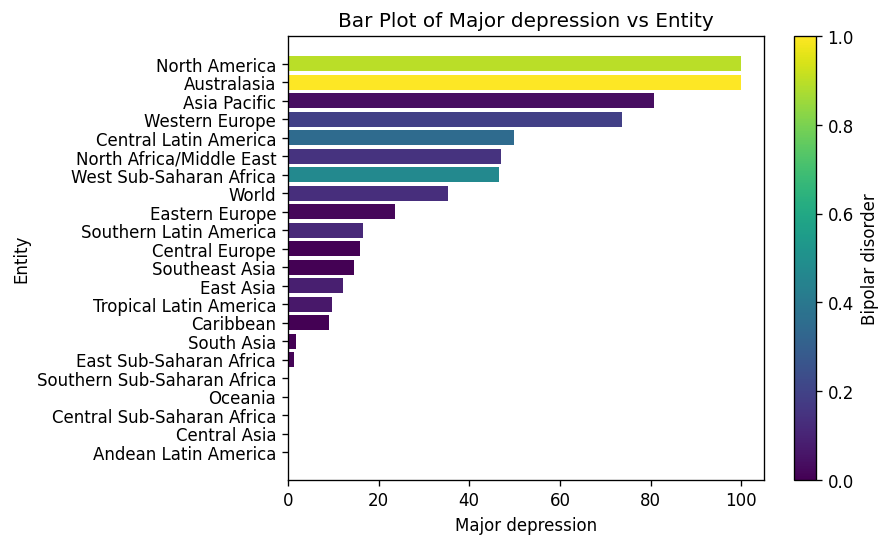

In [8]:
# Sort the DataFrame by "Major depression"
df2.sort_values(by="Major depression", inplace=True)

# Assign colors based on the values in the "Bipolar disorder" column
colors = plt.cm.viridis(df2["Bipolar disorder"] / max(df2["Bipolar disorder"]))

# Create a horizontal bar plot
plt.figure(dpi=120)
bars = plt.barh(df2["Entity"], df2["Major depression"], color=colors)
plt.xlabel("Major depression")
plt.ylabel("Entity")
plt.title("Bar Plot of Major depression vs Entity")

# Add color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cbar.set_label("Bipolar disorder")

# Extract unique values from the "Bipolar disorder" column for legend labels
legend_labels = df2["Bipolar disorder"].unique()

# Add color legend
plt.legend(handles=bars, labels=legend_labels, title="Bipolar disorder", loc='lower right')

plt.show()